Task 1) \
 Create a data frame that contains the following information for each drug: unique
drug identifier in the DrugBank database, name of the drug, its type, description, form in which the drug is given
occurs, indications, mechanism of action and information with which foods the drug is eaten
interacts. \
Solution: There can be many drugbank-id's so we will take the one that is marked as primary.

In [1]:
!pip install pandas
!pip install xmltodict

In [6]:
import pandas as pd
import xmltodict
from IPython.display import display

file_path = "drugbank_partial.xml"

with open(file_path, "r", encoding="utf-8") as file:
    data_dict = xmltodict.parse(file.read())

drugs = data_dict["drugbank"]["drug"]

def get_id(drug):
    drug_id = None
    if isinstance(drug['drugbank-id'], list):
        for item in drug['drugbank-id']:
            if isinstance(item, dict) and item.get('@primary') == 'true':
                drug_id = item.get('#text')
                break
    elif isinstance(drug['drugbank-id'], dict):
        if drug['drugbank-id'].get('@primary') == 'true':
            drug_id = drug['drugbank-id'].get('#text')
    return drug_id

def get_name(drug):
    return drug.get("name")

def get_type(drug):
    return drug.get("@type")

def get_description(drug):
    return drug.get("description")

def get_dosage_form(drug):
    return drug.get("state")

def get_indication(drug):
    return drug.get("indication")

def get_mechanism_of_action(drug):
    return drug.get("mechanism-of-action")

def get_food_interactions(drug):
    interactions = []
    if not drug.get("food-interactions"):
        return interactions
    for interaction in drug.get("food-interactions").values():
        interactions.append(interaction)
    return interactions

def find_data():
    records = []
    for drug in drugs:
        record = {
            "DrugBank ID": get_id(drug),
            "Name": get_name(drug),
            "Type": get_type(drug),
            "Description": get_description(drug),
            "Dosage Form": get_dosage_form(drug),
            "Indication": get_indication(drug),
            "Mechanism of Action": get_mechanism_of_action(drug),
            "Food Interactions": get_food_interactions(drug)
        }
        records.append(record)
    return records

filtered_df = pd.DataFrame(find_data())

display(filtered_df)

,DrugBank ID,Name,Type,Description,Dosage Form,Indication,Mechanism of Action,Food Interactions
0,DB00001,Lepirudin,biotech,Lepirudin is a recombinant hirudin formed by 6...,solid,Lepirudin is indicated for anticoagulation in ...,Lepirudin is a direct thrombin inhibitor used ...,[Avoid herbs and supplements with anticoagulan...
1,DB00002,Cetuximab,biotech,Cetuximab is a recombinant chimeric human/mous...,liquid,Cetuximab indicated for the treatment of local...,The epidermal growth factor receptor (EGFR) is...,[]
2,DB00003,Dornase alfa,biotech,Dornase alfa is a biosynthetic form of human d...,liquid,Used as adjunct therapy in the treatment of cy...,Dornase alfa is a biosynthetic form of human D...,[]
3,DB00004,Denileukin diftitox,biotech,A recombinant DNA-derived cytotoxic protein co...,liquid,For treatment of cutaneous T-cell lymphoma,Denileukin diftitox binds to the high-affinity...,[]
4,DB00005,Etanercept,biotech,Dimeric fusion protein consisting of the extra...,liquid,Etanercept is indicated for the treatment of m...,There are two distinct receptors for TNF (TNFR...,[]
...,...,...,...,...,...,...,...,...
95,DB00104,Octreotide,biotech,Acromegaly is a disorder caused by excess grow...,solid,Octreotide by injection is used for the treatm...,Octreotide binds to somatostatin receptors cou...,[[Take on an empty stomach. The oral capsules ...
96,DB00105,Interferon alfa-2b,biotech,Interferon alpha 2b (human leukocyte clone hif...,liquid,"For the treatment of hairy cell leukemia, mali...",Interferon alpha binds to type I interferon re...,[Avoid alcohol.]
97,DB00106,Abarelix,small molecule,Synthetic decapeptide antagonist to gonadotrop...,solid,For palliative treatment of advanced prostate ...,Abarelix binds to the gonadotropin releasing h...,[]
98,DB00107,Oxytocin,biotech,Sir Henry H. Dale first identified oxytocin an...,liquid,Administration of exogenous oxytocin is indica...,Oxytocin plays a vital role in labour and deli...,[]


Task 2) \
Create a data frame that allows you to search for information about DrugBank ID
all synonyms under which a given drug appears. Write a function that for the given
DrugBank ID will create and draw a synonym graph using the NetworkX library. You should
ensure the readability of the generated drawing. \
Solution: The selected drug will be in the middle of the graph and its synonyms will be connected to it.

In [12]:
!pip install networkx
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 17.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 7.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 21.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 22.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 3.7 MB/s eta 0:00:00


Synonyms DataFrame:


,DrugBank ID,Synonyms
0,DB00001,"[[Leu1, Thr2]-63-desulfohirudin, Desulfatohiru..."
1,DB00002,"[Cetuximab, Cétuximab, Cetuximabum]"
2,DB00003,[Deoxyribonuclease (human clone 18-1 protein m...
3,DB00004,"[Denileukin, Denileukin diftitox, Interleukin-..."
4,DB00005,"[Etanercept, etanercept-szzs, etanercept-ykro,..."
...,...,...
95,DB00104,"[Octreotida, Octreotide, Octreotidum, Octrotide]"
96,DB00105,"[Interferon alfa-2b, Interferon alfa-2b (recom..."
97,DB00106,[Abarelix]
98,DB00107,"[Oxitocina, Oxytocin]"


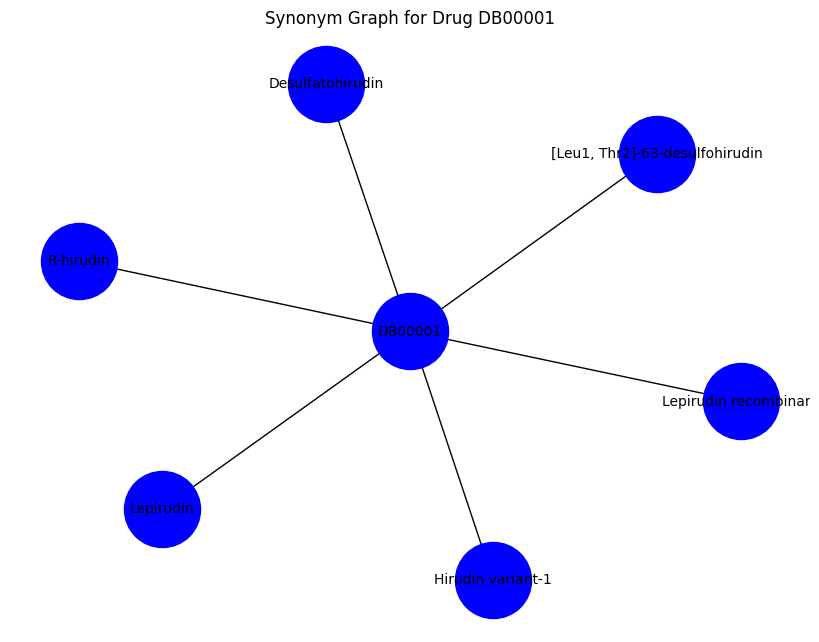

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

def get_synonyms(drug):
    synonyms = []
    if "synonyms" in drug and drug["synonyms"]:
        syn_data = drug["synonyms"]
        if "synonym" in syn_data:
            syns = syn_data["synonym"]
            if isinstance(syns, list):
                for syn in syns:
                    if isinstance(syn, dict):
                        text = syn.get("#text", "").strip()
                        if text:
                            synonyms.append(text)
                    elif isinstance(syn, str):
                        synonyms.append(syn.strip())
            elif isinstance(syns, dict):
                text = syns.get("#text", "").strip()
                if text:
                    synonyms.append(text)
            elif isinstance(syns, str):
                synonyms.append(syns.strip())
    return synonyms

def create_synonyms_df():
    records = []
    for drug in drugs:
        drug_id = get_id(drug)
        syns = get_synonyms(drug)
        records.append({"DrugBank ID": drug_id, "Synonyms": syns})
    return pd.DataFrame(records)


# Create the DataFrame of synonyms
synonyms_df = create_synonyms_df()
print("Synonyms DataFrame:")
display(synonyms_df)

def draw_synonym_graph(drugbank_id, synonyms_df):
    record = synonyms_df[synonyms_df["DrugBank ID"] == drugbank_id]
    if record.empty:
        print(f"No drug found with ID {drugbank_id}")
        return
    synonyms = record.iloc[0]["Synonyms"]

    G = nx.Graph()
    G.add_node(drugbank_id)
    for syn in synonyms:
        G.add_node(syn)
        G.add_edge(drugbank_id, syn)

    pos = nx.spring_layout(G)   # Creates the star-like layout
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color="blue", node_size=3000, font_size=10)
    plt.title(f"Synonym Graph for Drug {drugbank_id}")
    plt.show()

draw_synonym_graph("DB00001", synonyms_df)

Task 3)\
Create a data frame about pharmaceutical products containing a given drug
(medicinal substance). The frame should contain information about the drug ID, product name,
manufacturer, code in the US national registry (*National Drug Code*), form in which
the product exists, method of application, information about the dose, country and registration agency
product. \
Solution: just parse data.


In [14]:
def get_products(drug):
    products = []
    if "products" in drug and drug["products"]:
        product_data = drug["products"].get("product")
        if product_data:
            if isinstance(product_data, list):
                products = product_data
            elif isinstance(product_data, dict):
                products = [product_data]
    return products

records = []
for drug in drugs:
    drug_id = get_id(drug)
    products = get_products(drug)
    if products is not None:
        for prod in products:
            record = {
                "DrugBank ID": drug_id,
                "Product Name": prod.get("name"),
                "Manufacturer": prod.get("labeller"),
                "National Drug Code": prod.get("ndc-product-code"),
                "Dosage Form": prod.get("dosage-form"),
                "Route of Administration": prod.get("route"),
                "Dosage Information": prod.get("strength"),
                "Country": prod.get("country"),
                "Regulatory Agency": prod.get("source")
            }
            records.append(record)

# Utworzenie DataFrame
df_products = pd.DataFrame(records)
display(df_products)

,DrugBank ID,Product Name,Manufacturer,National Drug Code,Dosage Form,Route of Administration,Dosage Information,Country,Regulatory Agency
0,DB00001,Refludan,Bayer,50419-150,Powder,Intravenous,50 mg/1mL,US,FDA NDC
1,DB00001,Refludan,Bayer,None,"Powder, for solution",Intravenous,50 mg / vial,Canada,DPD
2,DB00001,Refludan,Celgene Europe Limited,None,"Injection, solution, concentrate",Intravenous,50 mg,EU,EMA
3,DB00001,Refludan,Celgene Europe Limited,None,"Injection, solution, concentrate",Intravenous,50 mg,EU,EMA
4,DB00001,Refludan,Celgene Europe Limited,None,"Injection, solution, concentrate",Intravenous,20 mg,EU,EMA
...,...,...,...,...,...,...,...,...,...
4579,DB00108,Tysabri,Elan Pharmaceuticals,59075-730,Injection,Intravenous,300 mg/15mL,US,FDA NDC
4580,DB00108,Tysabri,Biogen Inc.,64406-008,Injection,Intravenous,300 mg/15mL,US,FDA NDC
4581,DB00108,Tysabri,Biogen,None,Solution,Intravenous,300 mg / 15 mL,Canada,DPD
4582,DB00108,Tysabri,Biogen Netherlands B.V.,None,"Injection, solution, concentrate",Intravenous,300 mg,EU,EMA


Task 4) \
Create a dataframe containing information about all of everyone's trails
types, i.e. signaling, metabolic, etc., with which any drug interacts.
Provide the total number of these routes. \
Solution: parse data and sum up the number of pathways.

In [21]:
def get_pathways(drug):
    pathways = []
    if isinstance(drug["pathways"], list):
        for pathway in drug["pathways"].values():
            pathways.append(pathway["name"])
    elif isinstance(drug["pathways"], dict):
        pathways.append(drug["pathways"]["pathway"]["name"])
    return pathways

def get_all_pathways():
    no_pathways = 0
    records = []
    for drug in drugs:
        drug_id = get_id(drug)
        pathways = get_pathways(drug)
        no_pathways += len(pathways)
        record = {
            "DrugBank ID": drug_id,
            "Pathways": pathways
        }
        records.append(record)
    return no_pathways, pd.DataFrame(records)

no_pathways, df = get_all_pathways()
print("Total number of pathways:", no_pathways)
display(df)

Total number of pathways: 12


,DrugBank ID,Pathways
0,DB00001,[Lepirudin Action Pathway]
1,DB00002,[Cetuximab Action Pathway]
2,DB00003,[]
3,DB00004,[]
4,DB00005,[]
...,...,...
95,DB00104,[]
96,DB00105,[]
97,DB00106,[]
98,DB00107,[]
